<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK3/blob/main/DSP_CORE_MOD2_IP_WK3_ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

> # b) Metrics for Success



Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

> # c) Understanding context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

> # d) Data Relevance

The dataset to use for this project can be found by following this link:http://bit.ly/hypothyroid_data. 

Below is the dataset glossary:

Dataset Columns

- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured
- TSH
- T3_measured
- T3
- TT4_measured
- TT4

# **2. Importing Libraries**

In [76]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [77]:
#Load the Data into a dataframe
#The dataset used in this project was provided in the following 
#url = "http://bit.ly/hypothyroid_data" 

df=pd.read_csv('/content/hypothyroid.csv')

#Viewing the first 5 entries
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# **4. Checking the Data**

In [78]:
# Determining the no. of records in the dataset
df.shape

(3163, 26)

In [79]:
# Checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [80]:
#Dataframe description

df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# **5. Tidying the Dataset**

In [81]:
#Dropping uneccesary columns

# df.drop(columns='TBG', inplace= True)

In [82]:
#Checking for Missing Values

df.isnull().values.any()

False

In [83]:
# Dealing with the Missing Data

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

# **7. Checking for & Removing Duplicates**

In [84]:
#checking data for duplicates
df.duplicated().values.any()

True

In [85]:
df.duplicated().sum()

77

In [86]:
#Dropping Duplicates

df.drop_duplicates(keep=False,inplace=True)

df.duplicated().values.any()


False

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [87]:
#checking column data type
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [88]:
#Frequency Tables

print("Sex Column Frequency table")
display(df.sex.value_counts())
print('')

print("Status Column Frequency table")
display(df.status.value_counts())
print('')


Sex Column Frequency table


F    2057
M     880
?      73
Name: sex, dtype: int64


Status Column Frequency table


negative       2879
hypothyroid     131
Name: status, dtype: int64

In [89]:
#Importing the seaborn library for visualization

import seaborn as sns

#setting a style

sns.set(style='whitegrid', palette='muted', color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Status')

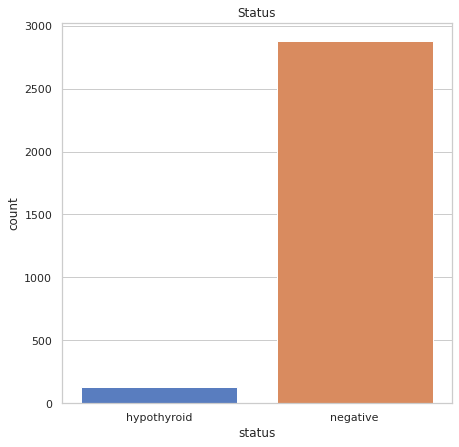

In [90]:
#plotting the condition column
plt.figure(figsize=(7, 7))
sns.countplot(df.status)
plt.title('Status')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex by Frequency')

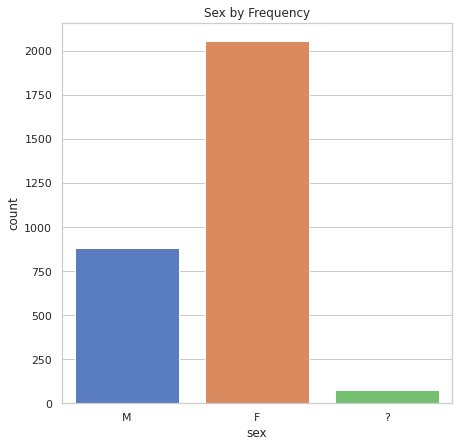

In [91]:
#plotting the grade column
plt.figure(figsize=(7, 7))
sns.countplot(df.sex)
plt.title('Sex by Frequency')

Most respondents were female

In [98]:
#Analyzing numerical columns

age_counts = df["age"].value_counts()
# df.groupby('sex').age.plot(kind='kde')
import plotly.express as px
fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

# **Bivariate Analysis**

Text(0.5, 1.0, 'Status vs Pregnancy')

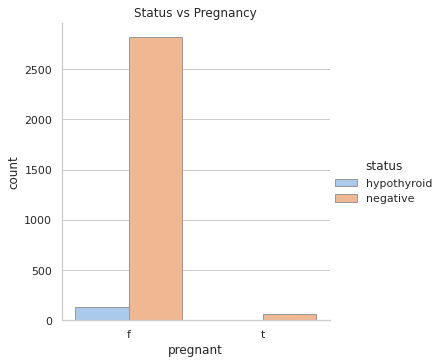

In [61]:
#checking how pregnancy relates to status

sns.catplot(x="pregnant", hue="status", kind="count",
            palette="pastel", edgecolor=".6", data=df)
plt.title("Status vs Pregnancy")

In [ ]:


agg_tips = df.groupby(['day', 'sex'])['tip'].sum().unstack().fillna(0)
agg_tips

# Sum up the rows of our data to get the total value of each bar.
totals = agg_tips.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')


In [ ]:
#Checking varibale correlation

plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=True)
plt.show()

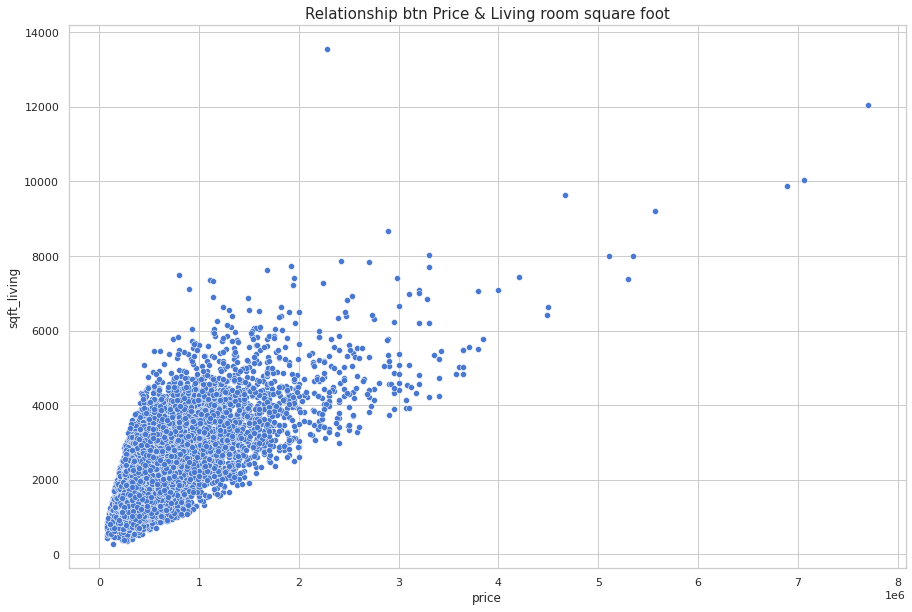

In [ ]:
#Relationship btn Price & Living room square foot

plt.figure(figsize=(15, 10))
sns.scatterplot(x='price', y='sqft_living', data=df)
plt.title('Relationship btn Price & Living room square foot', fontsize=15)
plt.show()

In [ ]:
#Relationship btn Categorical & Numerical variables

sns.pairplot(df,hue='condition')
plt.show()

#**Multivariate Analysis**

#Multivariate Regression Analysis





In [ ]:
#Making a list of Dependent & Independent variables

#separate the other attributes from the predicting attribute
x = df.drop('price',axis=1)
#separate the predicting attribute into Y for model training 
y = df['price']

In [ ]:
#Splitting the data

# importing train_test_split from sklearn

from sklearn.model_selection import train_test_split
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#From the sklearn module we will use the LinearRegression() method to create a linear regression object.
# This object has a method called fit() that takes the independent and dependent values as parameters 
# and fills the regression object with data that describes the relationship


# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting test set results

y_prediction =  LR.predict(x_test)
y_prediction

array([  84367.87283458,  330390.24541614, 1036084.82602524, ...,
        530356.38262174,  226917.60376267, 1100775.14709574])

In [ ]:
# importing r2_score module to check our model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.6821998239045917
mean_sqrd_error is== 38030084494.494446
root_mean_squared error of is== 195013.03672958494


Text(0.5, 1.0, 'Actual vs Predicted')

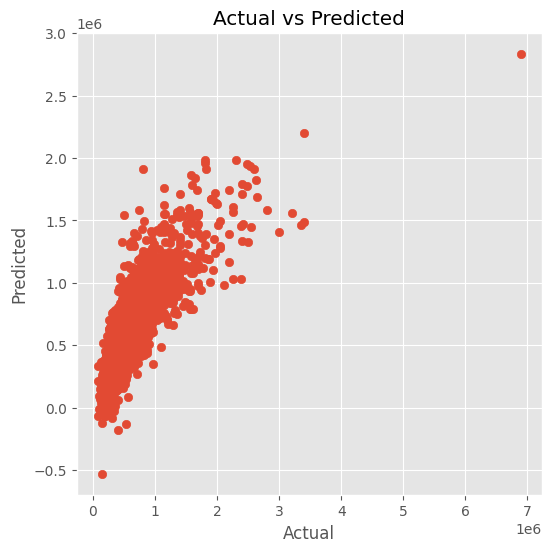

In [ ]:
#Plotting the results

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_prediction)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual vs Predicted')


#Quantile Regression Analysis





In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf


In [ ]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


#Ridge Regression Analysis





In [ ]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)


40501094629.69728


In [ ]:
#create our ridge model and indicate normalization in order to get better estimates
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength.
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41003795765.03559

In [ ]:
## We can confirm this by fitting our model with the ridge information and finding the mean squared error below
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(second_model)

40507420437.20115



#Lasso Regression Analysis





In [ ]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6999608284704923
lasso MSE: 40501094672.67543
lasso coef: [ -3766.69192708 -33237.55604261  31584.61998728 259519.67485432
   5008.88657376   3742.7604078   50345.23699033  40831.6586881
  17153.67869608 112975.41836491 -83951.24020882 -58579.83537427
 -77069.40768071   8059.13454251 -31169.64448631  83507.29365442
 -29933.68323854  14836.20921419 -10817.41906936]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27068762899870.625, tolerance: 291664301074.9131
  positive)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 4.0}
lasso score: 0.6822148007932706
linear score: 0.6821998239045917
lasso MSE: 38028292260.30213
linear MSE: 38030084494.494446
lasso best estimator coef: [-9.70414639e-07 -3.57179371e+04  3.96043279e+04  2.93204822e+02
  1.47417098e-01  6.30265977e+03  6.15380732e+05  5.09685665e+04
  2.69749286e+04  9.70358345e+04 -1.04187189e+02 -1.39809951e+02
 -2.60893616e+03  2.21602364e+01 -6.01206384e+02  6.05480949e+05
 -2.23861413e+05  1.56613802e+01 -4.16655878e-01]
linear coef: [-9.69459398e-07 -3.57220250e+04  3.96173093e+04  1.14129096e+02
  1.47580423e-01  6.30716335e+03  6.15971841e+05  5.09475996e+04
  2.69886606e+04  9.70254856e+04  7.48852255e+01  3.92438702e+01
 -2.60842916e+03  2.21577934e+01 -6.01764702e+02  6.05739763e+05
 -2.24223220e+05  1.56737027e+01 -4.16447365e-01]



#Elastic Net Regression





In [ ]:
# Creating our linear regression model for the purpose of comparison
from sklearn.linear_model import ElasticNet

regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

40501094629.69729


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(x,y)
search.best_params_
abs(search.best_score_)

41045569418.13005

In [ ]:
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

79376136539.57597


# **INSIGHTS FOR IMPROVEMENT**

1. Plotting for Mulivariate regression proved to be a problem